## 2D toy examples

In [1]:
from gp_sinkhorn.SDE_solver import solve_sde_RK
from gp_sinkhorn.utils import plot_trajectories_2
from gp_sinkhorn.MLE_drift import *
from gp_sinkhorn import MLE_drift
from sklearn import datasets

import copy
import torch
import math
import numpy as np
import matplotlib.pyplot as plt

from pyro.contrib.gp.kernels import Exponential, Matern32, RBF, Brownian, Combination, Product, Sum
from celluloid import Camera
from IPython.display import HTML
from sklearn.datasets import make_swiss_roll

from plotting_utils import plot_trajectories_both_3d, plot_tensor, display_result

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

sigma = 0.03
dt = 0.03
N = int(math.ceil(1.0/dt))

np.random.seed(0)
n = 200
noise = 0.0

cuda


In [3]:
# Gaussian noise as X_0
X0 = np.random.randn(n, 2)

In [4]:
def initial_plot(X0, X1):
    plt.plot(X0[:,0], X0[:,1], '.')
    plt.plot(X1[:,0], X1[:,1], '.')
    plt.show()
    
def normalize(xs):
    return (xs - xs.mean()) / xs.std()

def normalize_both(xs):
    xs[:, 0] = normalize(xs[:, 0])
    xs[:, 1] = normalize(xs[:, 1])
    # Don't need to return (passed by reference), but cleaner this way
    return xs  

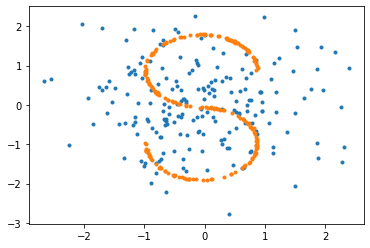

In [5]:
# S-curve
X1 = normalize(datasets.make_s_curve(n_samples=n, noise=0.01)[0][:, [0, 2]])
initial_plot(X0, X1)

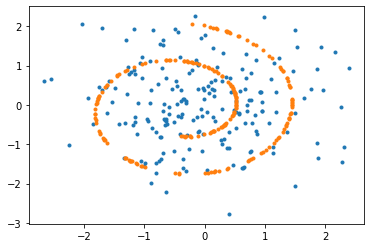

In [6]:
# Spiral
X2 =  normalize_both(make_swiss_roll(n_samples=n, noise=0.01)[0][:, [0, 2]])
initial_plot(X0, X2)

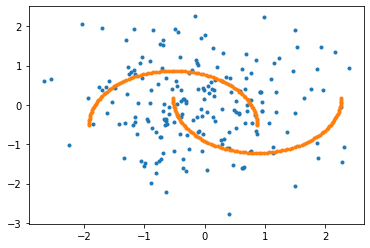

In [7]:
# Moons
X3 = normalize(datasets.make_moons(n_samples=n, noise=noise)[0])
initial_plot(X0, X3)

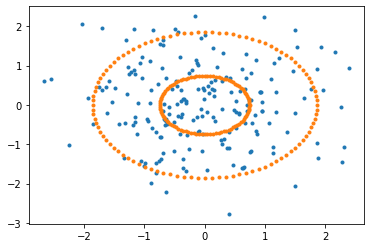

In [8]:
# Circles
X4 = normalize((datasets.make_circles(n_samples=n, factor=0.4, noise=noise)[0]))
initial_plot(X0, X4)

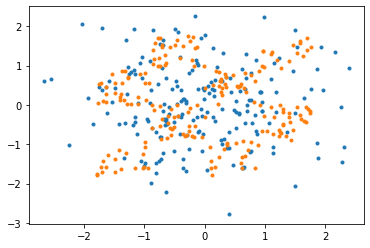

In [9]:
# Checkers
X5a = np.random.rand(n) * 4 - 2
X5b = np.random.rand(n) - np.random.randint(0, 2, n) * 2 + (np.floor(X5a) % 2)
X5 = normalize(np.concatenate([X5a[:, None], X5b[:, None]], 1))
initial_plot(X0, X5)

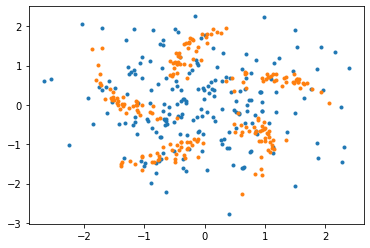

In [10]:
# Pinwheel
radial_std = 0.3
tangential_std = 0.1
num_classes = 5
num_per_class = n // 5
rate = 0.25
rads = np.linspace(0, 2 * np.pi, num_classes, endpoint=False)

features = (np.random.randn(num_classes * num_per_class, 2) *
            np.array([radial_std, tangential_std]))
features[:, 0] += 1
labels = np.repeat(np.arange(num_classes), num_per_class)

angles = rads[labels] + rate * np.exp(features[:, 0])
rotations = np.stack([np.cos(angles), -np.sin(angles), np.sin(angles), np.cos(angles)])
rotations = np.reshape(rotations.T, (-1, 2, 2))    
X6 = normalize(np.random.permutation(np.einsum("ti,tij->tj", features, rotations)))
initial_plot(X0, X6)

In [11]:
with torch.cuda.device(0):
    X0 = torch.tensor(X0).to(device)
    X1 = torch.tensor(X1).to(device)
    X2 = torch.tensor(X2).to(device)
    X3 = torch.tensor(X3).to(device)
    X4 = torch.tensor(X4).to(device)
    X5 = torch.tensor(X5).to(device)
    X6 = torch.tensor(X6).to(device)
    

  0%|          | 0/10 [00:00<?, ?it/s] /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:250: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:251: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:277: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:278: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() o

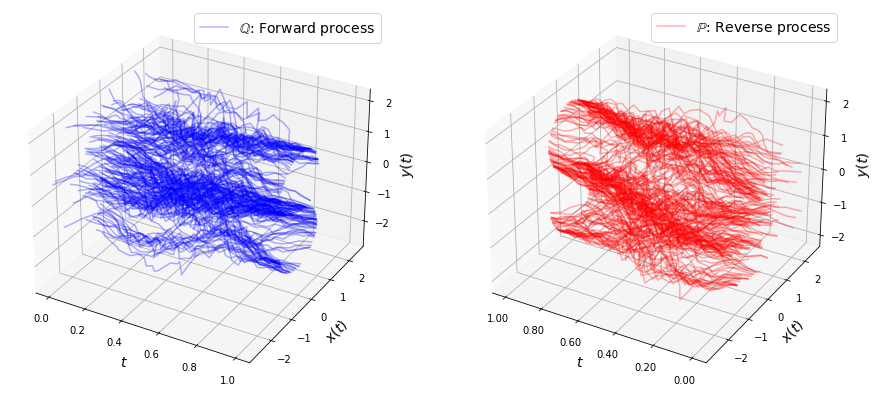

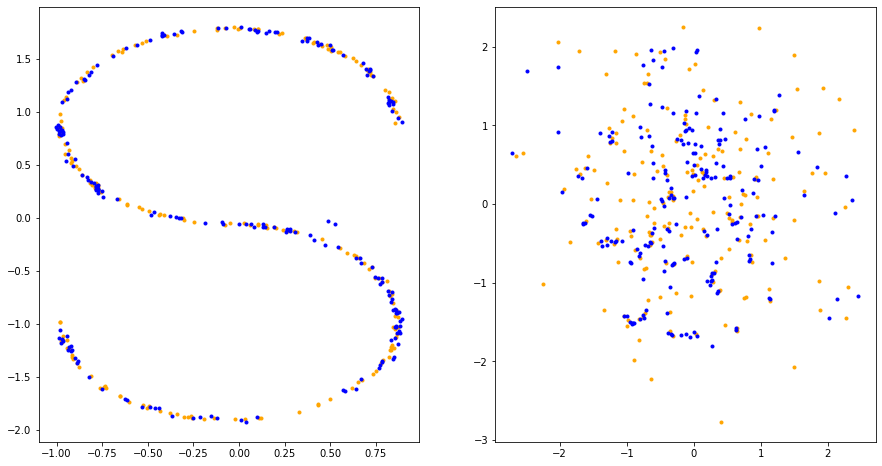

  0%|          | 0/10 [00:00<?, ?it/s] /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:250: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:251: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:277: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:278: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() o

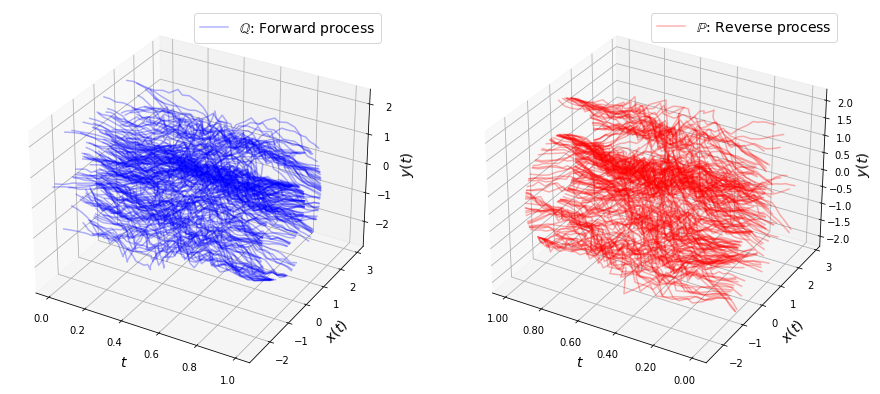

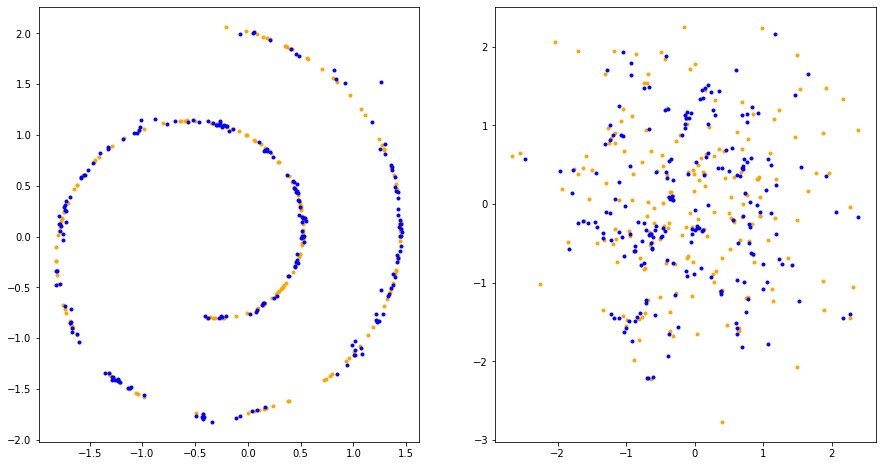

  0%|          | 0/10 [00:00<?, ?it/s] /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:250: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:251: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:277: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:278: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() o

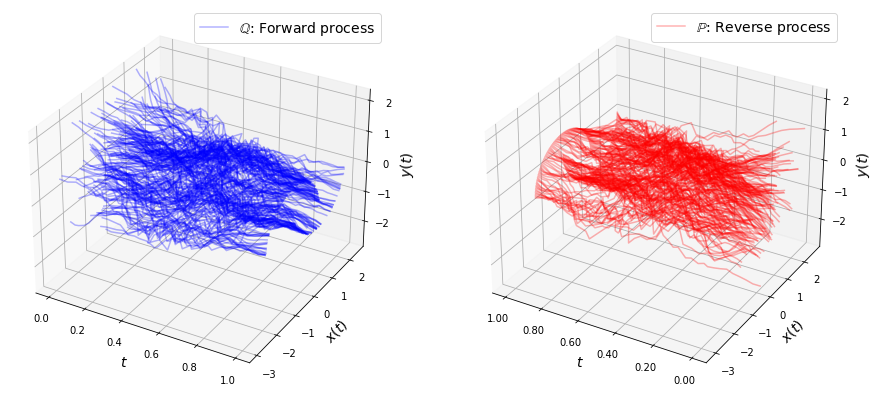

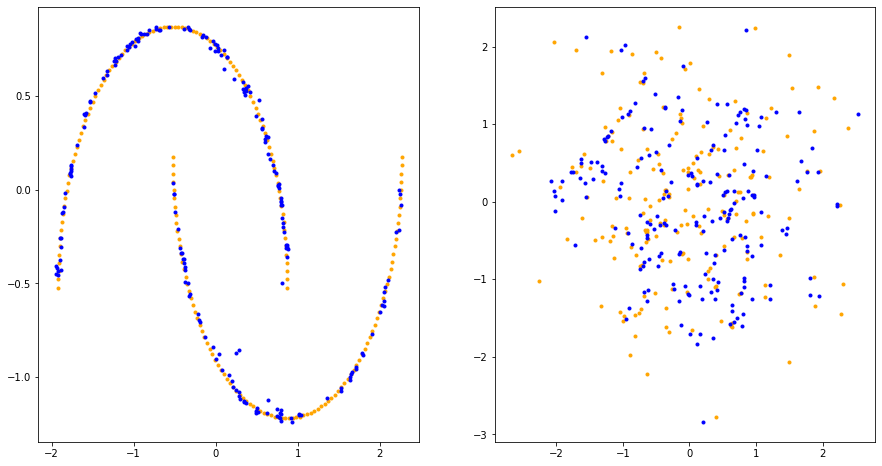

  0%|          | 0/10 [00:00<?, ?it/s] /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:250: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:251: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:277: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:278: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() o

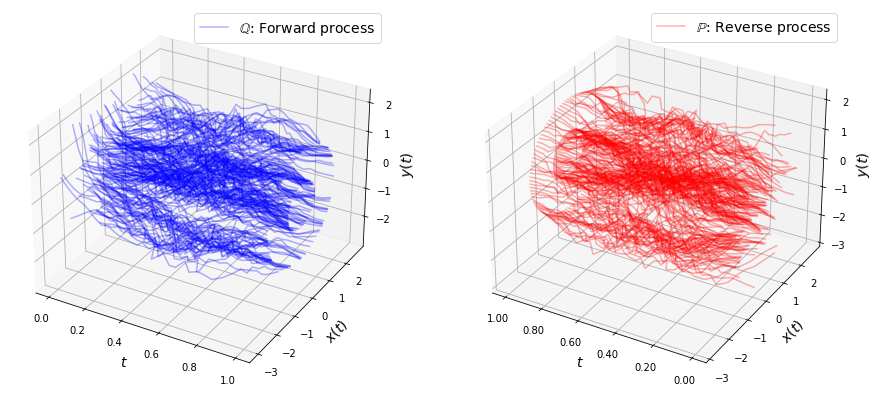

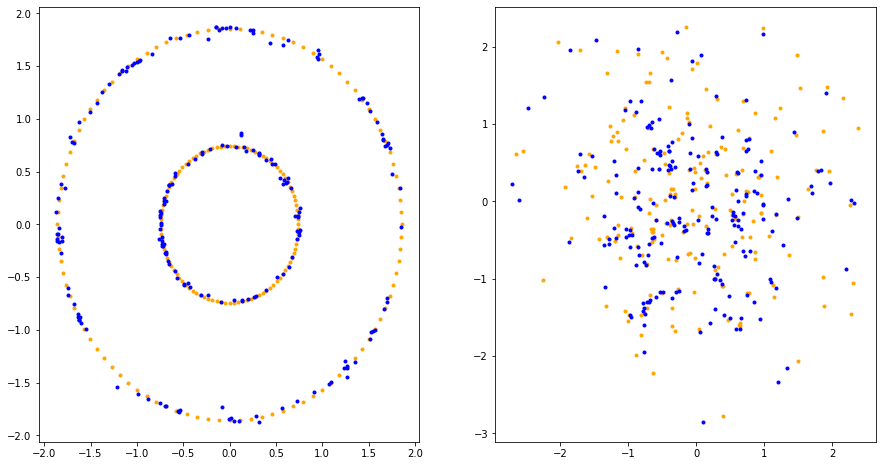

  0%|          | 0/10 [00:00<?, ?it/s] /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:250: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:251: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:277: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:278: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() o

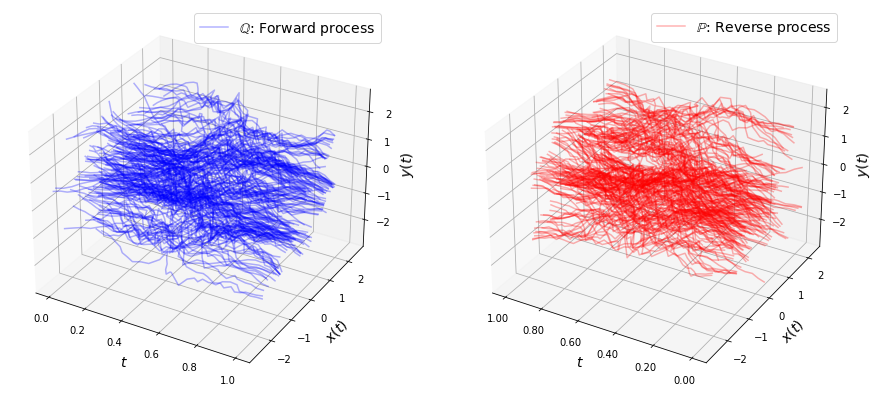

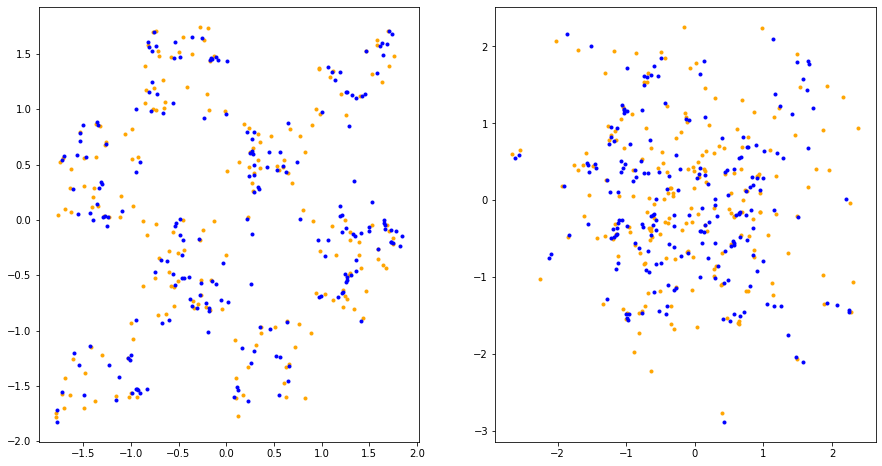

  0%|          | 0/10 [00:00<?, ?it/s] /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:250: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:251: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:277: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
 /local/scratch/home/adt44/GP_Sinkhorn/gp_sinkhorn/MLE_drift.py:278: UserWarning:To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() o

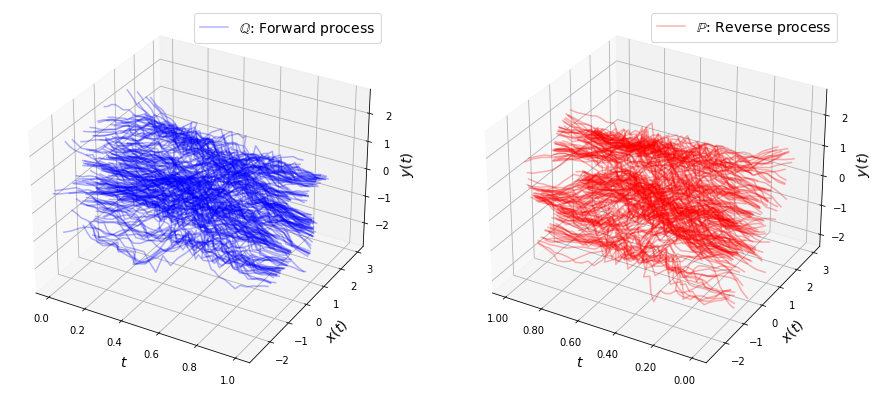

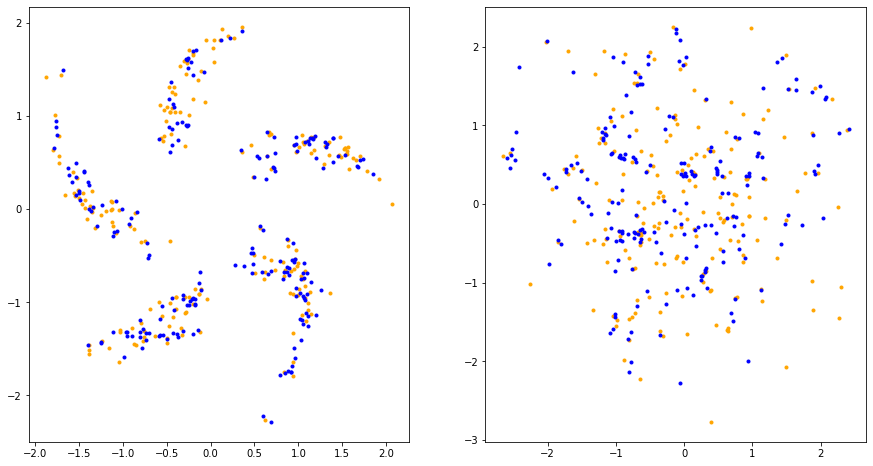

In [12]:
for X in (X1, X2, X3, X4, X5, X6):
    result = MLE_IPFP(X0, X, N=N, device=device, sigma=(0.001, 1), kernel=gp.kernels.Exponential)
    display_result(result, X0, X)